----------------------------------------------
Finished Training with LINEAR
Predicted: -18.538976776679984. Expected: 0.995
Predicted: 5.79474007718383. Expected: 7.176
Predicted: 10.27311571602763. Expected: 6.914
Predicted: 44.634381513167426. Expected: 40.131
Predicted: -1.8142801216548428. Expected: 2.66
Predicted: -0.3718921367599357. Expected: 2.82
Train MSE: 116.21036305378279 
 Test MSE: 74.20926485879978
Finished testing
Weights: [16.17843145  2.49672162 -6.49963416 16.72469666]. MSE_train: 116.21036305378279. MSE_test: 74.20926485879978
----------------------------------------------
Finished Training with LINEAR
Predicted: -8.058470586510285. Expected: 4.653
Predicted: 45.55399745564763. Expected: 49.0
Predicted: 28.453334341616355. Expected: 18.243
Predicted: 47.625889756475225. Expected: 40.131
Predicted: 41.343556891048934. Expected: 43.045
Predicted: 42.850258406506676. Expected: 64.107
Train MSE: 89.05501069460152 
 Test MSE: 131.43744827704214
Finished testing
Weights:

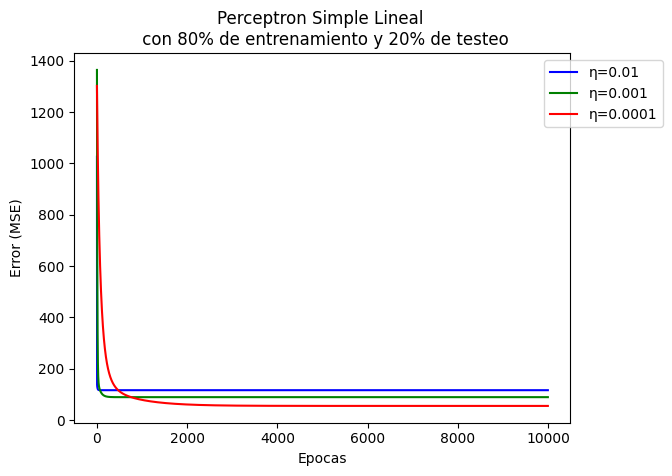

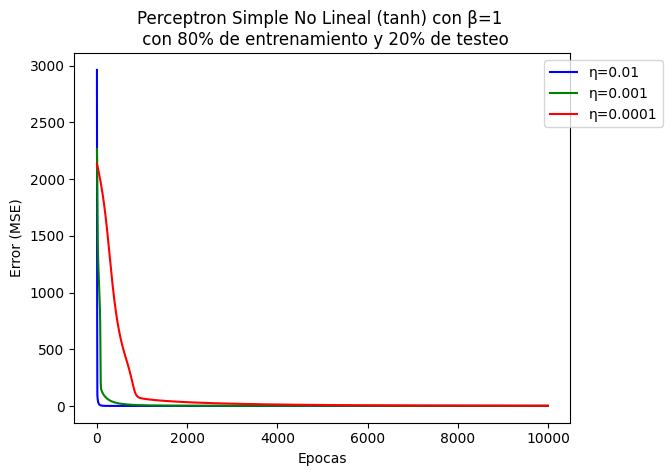

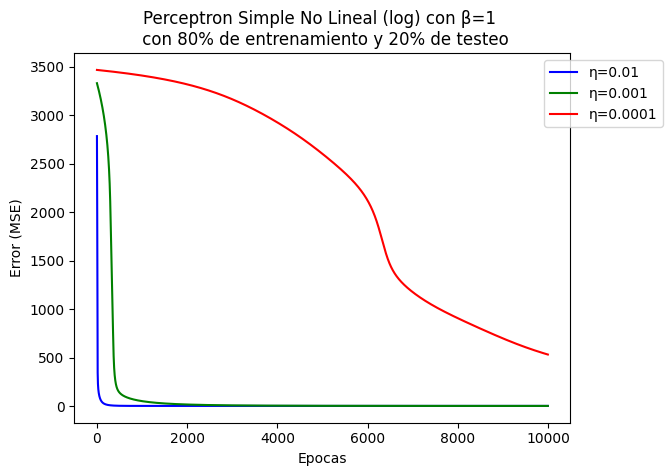

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import get_data
from src.perceptron import Perceptron
import math
from src.utils import perceptron_type_str, get_train_type

PERCEPTRON_TYPE = ["LINEAR", "NON_LINEAR_TANH", "NON_LINEAR_LOG"]
TRAINING_TYPE = ["PERCENTAGE", "K-FOLD"]
LR = 0.01
EPOCHS = 10000
BETA = 1
MIN_ERROR = 0.1
TRAINING_PERCENTAGE = 0.8
K_FOLD = 4

input_data, expected_data = get_data(1)


#-------------------------------------------------
# VARIANDO EL LEARNING RATE
#-------------------------------------------------

arr_of_errors = []
arr_of_epochs = []
lrs = [LR*(10**(-i)) for i in range(3)]

for i, perceptron_type in enumerate(PERCEPTRON_TYPE):
    arr_of_error_aux = []
    arr_of_epochs_aux = []
    for lr in lrs:
        perceptron = Perceptron(input_data, expected_data, perceptron_type, lr, EPOCHS, BETA, MIN_ERROR, "PERCENTAGE", TRAINING_PERCENTAGE, K_FOLD)
        weights, mse_errors, test_mse, total_epochs = perceptron.train()
        arr_of_error_aux.append(mse_errors)
        arr_of_epochs_aux.append(total_epochs)
        
    arr_of_errors.append(arr_of_error_aux)
    arr_of_epochs.append(arr_of_epochs_aux)
    
colors = ['blue', 'green', 'red']

for i, perceptron_type in enumerate(PERCEPTRON_TYPE):
    for j in range(len(arr_of_errors[i])):
        plt.plot(range(arr_of_epochs[i][j]), arr_of_errors[i][j], color=colors[j], label=f"η={lrs[j]}")
    plt.title(f'Perceptron Simple {perceptron_type_str(perceptron_type, BETA)} \n con {get_train_type("PERCENTAGE", TRAINING_PERCENTAGE, K_FOLD)}')
    plt.xlabel("Epocas")
    plt.ylabel("Error (MSE)")
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()
       

----------------------------------------------
Finished Training with NON_LINEAR_TANH
Predicted: 49.29691258022768. Expected: 51.0
Predicted: 37.8046887033306. Expected: 7.176
Predicted: 13.57422555681479. Expected: 1.48
Predicted: 31.0504035588952. Expected: 18.543
Predicted: 18.81523318217667. Expected: 0.995
Predicted: 25.800880564994213. Expected: 2.875
Train MSE: 267.4589288989593 
 Test MSE: 347.813204066104
Finished testing
Weights: [-0.19542539 -0.0460405  -1.29545357  0.61055768]. MSE_train: 267.4589288989593. MSE_test: 347.813204066104
----------------------------------------------
Finished Training with NON_LINEAR_TANH
Predicted: 3.992537497396541. Expected: 1.48
Predicted: 25.786757741013496. Expected: 21.417
Predicted: 19.156672263334617. Expected: 7.871
Predicted: 53.95013839054071. Expected: 43.045
Predicted: 29.3079574801515. Expected: 26.503
Predicted: 75.36907823552387. Expected: 76.852
Train MSE: 69.30774848058589 
 Test MSE: 46.96048542803849
Finished testing
Weight

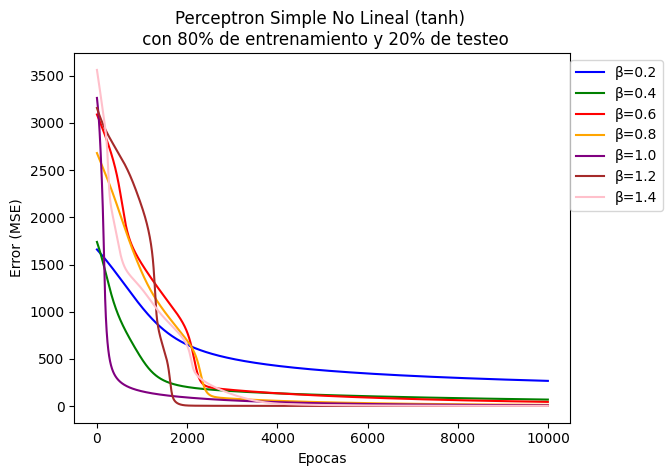

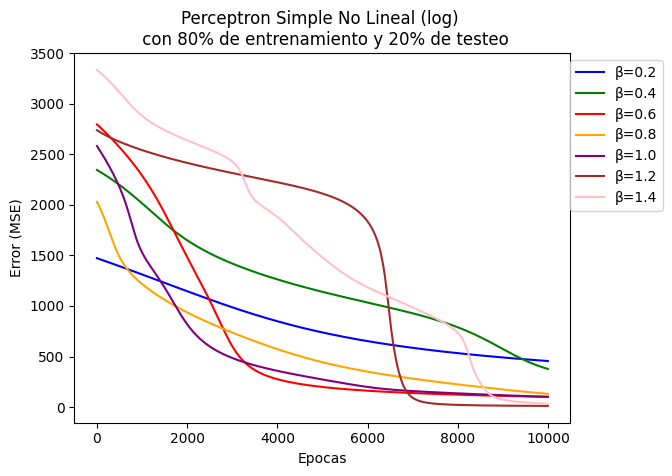

In [2]:
#-------------------------------------------------
# VARIANDO EL BETA
#-------------------------------------------------

PERCEPTRON_NON_LINEAR_TYPES = ["NON_LINEAR_TANH", "NON_LINEAR_LOG"]
arr_of_errors = []
arr_of_epochs = []
BETAS = [round(0.2*i,2) for i in range(1,8)]
LR = 0.0001
EPOCHS = 10000
BETA = 1
MIN_ERROR = 0.1

for perceptron_type in enumerate(PERCEPTRON_NON_LINEAR_TYPES):
    arr_of_error_aux = []
    arr_of_epochs_aux = []
    for beta in BETAS:
        perceptron = Perceptron(input_data, expected_data, perceptron_type, LR, EPOCHS, beta, MIN_ERROR, "PERCENTAGE", TRAINING_PERCENTAGE, K_FOLD)
        weights, mse_errors, test_mse, total_epochs = perceptron.train()
        arr_of_error_aux.append(mse_errors)
        arr_of_epochs_aux.append(total_epochs)
        
    arr_of_errors.append(arr_of_error_aux)
    arr_of_epochs.append(arr_of_epochs_aux)
    
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', "yellow"]

for i, perceptron_type in enumerate(PERCEPTRON_NON_LINEAR_TYPES):
    for j in range(len(arr_of_errors[i])):
        plt.plot(range(arr_of_epochs[i][j]), arr_of_errors[i][j], color=colors[j], label=f"β={BETAS[j]}")
    plt.title(f'Perceptron Simple No Lineal ({"tanh" if i==0 else "log"}) \n con {get_train_type("PERCENTAGE", TRAINING_PERCENTAGE, K_FOLD)}')
    plt.xlabel("Epocas")
    plt.ylabel("Error (MSE)")
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()

----------------------------------------------
Finished Training with LINEAR
Predicted: 24.33580357922265. Expected: 18.243
Predicted: -12.456599115825803. Expected: 4.653
Predicted: -8.102983288854778. Expected: 2.875
Predicted: 33.34796530291658. Expected: 21.417
Predicted: 47.62201253475373. Expected: 40.131
Predicted: 37.18356377175739. Expected: 17.654
Predicted: 63.6042554026344. Expected: 76.852
Predicted: 49.36601167454434. Expected: 23.183
Predicted: 50.269185099125394. Expected: 64.107
Predicted: -12.860674229003276. Expected: 0.32
Predicted: -1.9382201325871051. Expected: 2.66
Predicted: 40.28328943945035. Expected: 43.045
Predicted: -7.552490147376826. Expected: 1.48
Predicted: 62.947761417810604. Expected: 61.301
Predicted: 66.14420999138675. Expected: 68.568
Predicted: 56.89981863062137. Expected: 51.0
Predicted: 28.331364296192817. Expected: 24.974
Predicted: 8.683281180084077. Expected: 6.914
Predicted: 9.467733779020397. Expected: 7.871
Predicted: -0.7621041095233885. 

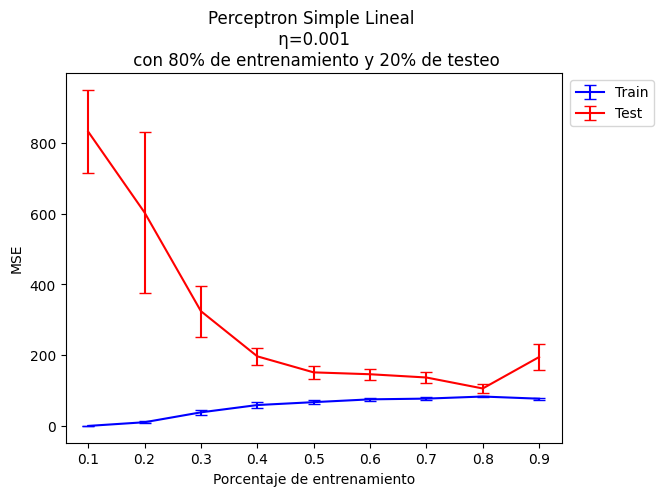

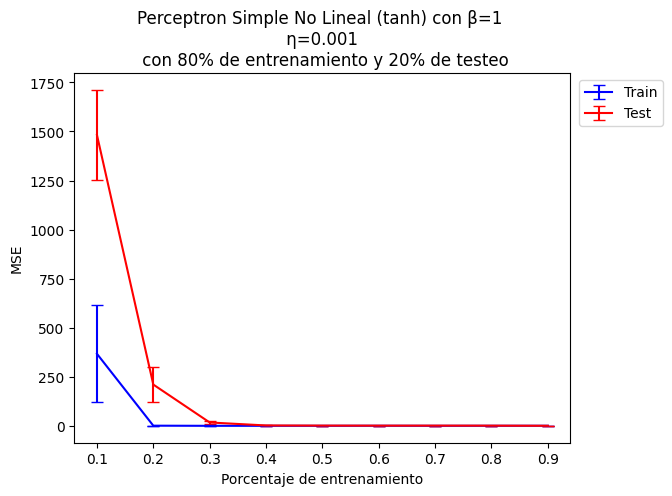

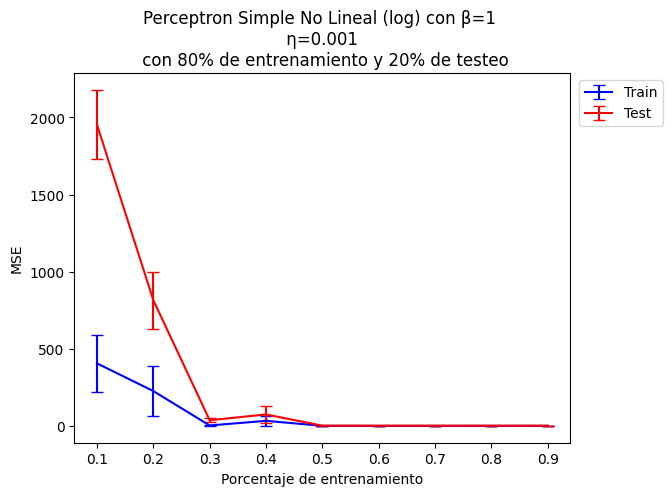

In [3]:
#-------------------------------------------------
# VARIANDO LOS PORCENTAJES
#-------------------------------------------------

PERCEPTRON_TYPE = ["LINEAR", "NON_LINEAR_TANH", "NON_LINEAR_LOG"]
LR = 0.001
EPOCHS = 20000
BETA = 1
MIN_ERROR = 0.1
TRAIN_PERCENTAGES = [round(0.1*i,2) for i in range(4,10)]
ITERATIONS = 20

arr_avg_train_mses = []
arr_std_train_mses = []
arr_avg_test_mses = []
arr_std_test_mses = []

for i, perceptron_type in enumerate(PERCEPTRON_TYPE):
    avg_train_mses = []
    std_train_mses = []
    avg_test_mses = []
    std_test_mses = []
    for p in TRAIN_PERCENTAGES:
        train = []
        test = []
        for iter in range(ITERATIONS):
            perceptron = Perceptron(input_data, expected_data, perceptron_type, LR, EPOCHS, BETA, MIN_ERROR, "PERCENTAGE", p, K_FOLD)
            weights, mse_errors, test_mse, total_epochs = perceptron.train()
            train.append(perceptron.train_MSE)
            test.append(test_mse)
            
        train_aux = sum(train) / len(train)
        avg_train_mses.append(train_aux)
        error_train = np.std(train) / np.sqrt((len(train)))
        std_train_mses.append(error_train)
        
        test_aux = sum(test) / len(test)
        avg_test_mses.append(test_aux)
        error_test = np.std(test) / np.sqrt((len(test)))
        std_test_mses.append(error_test)
                    
    arr_avg_train_mses.append(avg_train_mses)
    arr_std_train_mses.append(std_train_mses)
    arr_avg_test_mses.append(avg_test_mses)
    arr_std_test_mses.append(std_test_mses)
    
colors = ['blue', 'green']

for i, perceptron_type in enumerate(PERCEPTRON_TYPE):
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_train_mses[i], yerr=arr_std_train_mses[i], color="blue", capsize=4, label="Train")
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_test_mses[i], yerr=arr_std_test_mses[i], color="red", capsize=4, label="Test")
    plt.title(f'Perceptron Simple {perceptron_type_str(perceptron_type, BETA)} \n η={LR} \n con {get_train_type("PERCENTAGE", TRAINING_PERCENTAGE, K_FOLD)}')
    plt.xlabel("Porcentaje de entrenamiento")
    plt.ylabel("MSE")
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()

In [3]:
#-------------------------------------------------
# VARIANDO K FOLD
#-------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from src.utils import get_data
from src.perceptron import Perceptron
import math
from src.utils import perceptron_type_str, get_train_type


PERCEPTRON_TYPE = ["LINEAR", "NON_LINEAR_TANH", "NON_LINEAR_LOG"]
LR = 0.001
EPOCHS = 20000
BETA = 1
MIN_ERROR = 0.1
K_FOLDS = [1, 2, 3, 4, 5, 6]
ITERATIONS = 20

arr_avg_train_mses = []
arr_std_train_mses = []
arr_avg_test_mses = []
arr_std_test_mses = []

for i, perceptron_type in enumerate(PERCEPTRON_TYPE):
    avg_train_mses = []
    std_train_mses = []
    avg_test_mses = []
    std_test_mses = []
    for p in K_FOLDS:
        train = []
        test = []
        for iter in range(ITERATIONS):
            perceptron = Perceptron(input_data, expected_data, perceptron_type, LR, EPOCHS, BETA, MIN_ERROR, "K_FOLD", 1, p)
            weights, mse_errors, test_mse, total_epochs = perceptron.train()
            train.append(perceptron.train_MSE)
            test.append(test_mse)
            
        train_aux = sum(train) / len(train)
        avg_train_mses.append(train_aux)
        error_train = np.std(train) / np.sqrt((len(train)))
        std_train_mses.append(error_train)
        
        test_aux = sum(test) / len(test)
        avg_test_mses.append(test_aux)
        error_test = np.std(test) / np.sqrt((len(test)))
        std_test_mses.append(error_test)
                    
    arr_avg_train_mses.append(avg_train_mses)
    arr_std_train_mses.append(std_train_mses)
    arr_avg_test_mses.append(avg_test_mses)
    arr_std_test_mses.append(std_test_mses)
    
colors = ['blue', 'green']

WIDTH = 0.25
br1 = np.arange(len(TRAIN_PERCENTAGES))
br2 = [x + WIDTH for x in br1]

for i, perceptron_type in enumerate(PERCEPTRON_TYPE):
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_train_mses[i], yerr=arr_std_train_mses[i], color="blue", capsize=4, label="Train")
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_test_mses[i], yerr=arr_std_test_mses[i], color="red", capsize=4, label="Test")
    plt.title(f'Perceptron Simple {perceptron_type_str(perceptron_type, BETA)} \n η={LR} \n con {get_train_type("PERCENTAGE", TRAINING_PERCENTAGE, K_FOLD)}')
    plt.xlabel("Porcentaje de entrenamiento")
    plt.ylabel("MSE")
    #plt.xticks([r + WIDTH/2 for r in range(len(TRAIN_PERCENTAGES))], TRAIN_PERCENTAGES)
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()

ModuleNotFoundError: No module named 'numpy'